In [53]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from nltk import pos_tag
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
import sys
import re
import os
import sys
#!{sys.executable} -m pip install spacy
#!{sys.executable} -m spacy download en

import spacy
import contractions

import sys
%matplotlib inline 
nltk.download('tagsets')
nltk.download('wordnet')

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Phoebe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
lemmatizer = WordNetLemmatizer()
import contractions
import spacy
from spacymoji import Emoji
import contextualSpellCheck
nlp = spacy.load("en_core_web_sm")
emoji = Emoji(nlp)
nlp.add_pipe('emoji', first=True)
vocab = list(nlp.vocab.strings)

def count_tags(title_with_tags):
    tag_count = {}
    for word, tag in title_with_tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1
    return(tag_count)

def expand_contractions(text):
    return contractions.fix(text)

def spacyPOS(message):
    doc = nlp(message)
    result = []
    
    for token in doc:
        if token._.is_emoji:
            result.append((token.lemma_, "EMOJI"))
        else:
            result.append((token.lemma_, token.pos_))
    return result


In [55]:
labels = ["Direct Harassment", "Hate Speech","Sexual Harassment","Trolling", "Others", "Toxic"]

batch_files = ['usanews.csv', 'foxnews0.csv', 'foxnews1.csv', 'foxnews2.csv', 'foxnews3.csv', 
                'nogla0.csv','pew0.csv', 'rae0_0.csv', 
                 'rae0_1.csv', 'terror0_0.csv', 'terror0_1.csv', 'disrespect0_0.csv', 'disrespect0_1.csv']


vid_files = ["foxnews_FULL.csv", "rae_FULL.csv",  "terror_FULL.csv",
             "usanews.csv" , "pew0.csv", "nogla0.csv", "disrespect_FULL"]


genre_files = ["gaming_channels_GENRE.csv", "news_channel_GENRE.csv" ]
files = []
files.extend(vid_files)
files.extend(genre_files)

In [56]:
src_folder = "Annotations/CSVs/"
dest_folder = "Annotations/CSVs/"
print(files)
for file in files:
    df = pd.read_csv(src_folder + file, index_col = 0)
    df['cleaned_message'] = df['message'].astype(str).str.split()
    df['cleaned_message'] = df['cleaned_message'].map(expand_contractions)
    df['POS'] = df['cleaned_message'].map(spacyPOS)
    df['tagCounts'] = df['POS'].map(count_tags)
    df.to_csv(dest_folder + file)

['foxnews_FULL.csv', 'rae_FULL.csv', 'terror_FULL.csv', 'usanews.csv', 'pew0.csv', 'nogla0.csv', 'disrespect_FULL', 'gaming_channels_GENRE.csv', 'news_channel_GENRE.csv']


AttributeError: 'list' object has no attribute 'lower'

In [ ]:
dh = df.loc[df['Direct Harassment'] == 1.0]
dh.head()

##### HS POS Tag Count

In [ ]:
hs = df.loc[df['Hate Speech'] == 1.0]
hs.head()

<ipython-input-213-49da2deb3432>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hs[tag] = hs['tagCounts'].map(lambda x: x.get(tag, 0))


<AxesSubplot:title={'center':'Frequency of POS Tags in Hate Speech'}>

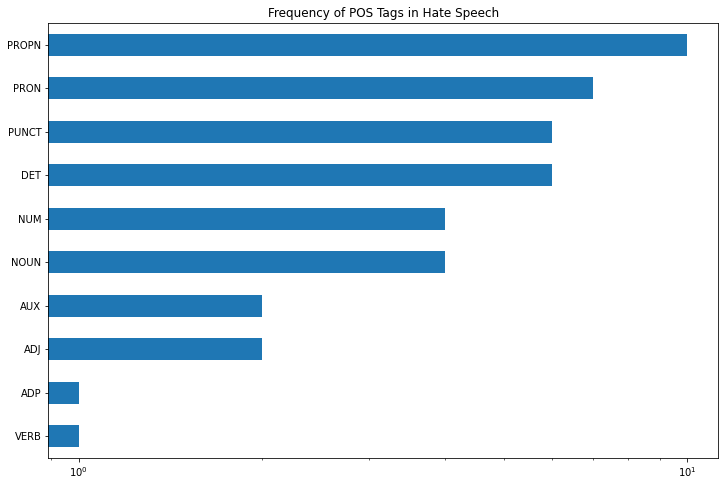

In [213]:
tag_set = list(set([tag for tags in hs['tagCounts'] for tag in tags]))
for tag in tag_set:
    hs[tag] = hs['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Hate Speech'    
hs[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

##### SH POS Tag Count

In [214]:
sh = df.loc[df['Sexual Harassment'] == 1.0]
sh.head()

,Unnamed: 0,message,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic,cleaned_message,POS,tagCounts


IndexError: index 0 is out of bounds for axis 0 with size 0

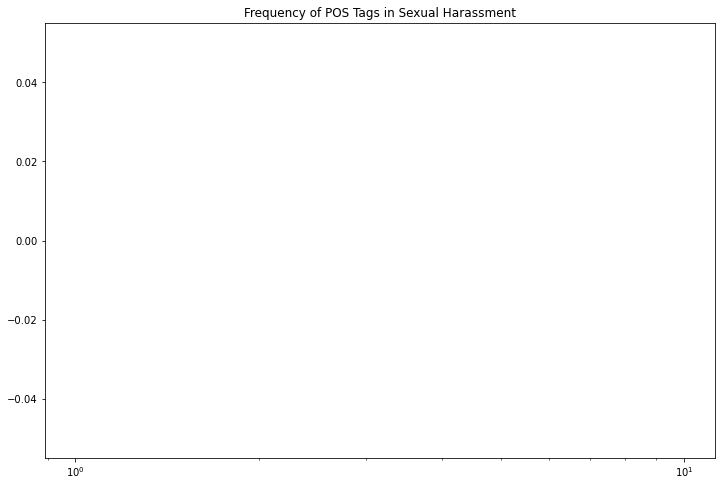

In [215]:
tag_set = list(set([tag for tags in sh['tagCounts'] for tag in tags]))
for tag in tag_set:
    sh[tag] = sh['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Sexual Harassment'    
sh[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

##### Trolling POS Tag Count

In [ ]:
t = df.loc[df['Trolling'] == 1.0]
t.head()

In [ ]:
tag_set = list(set([tag for tags in t['tagCounts'] for tag in tags]))
for tag in tag_set:
    t[tag] = t['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Trolling'    
t[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

##### Others POS Tag Count

In [ ]:
o = df.loc[df['Others'] == 1.0]
o.head()

In [ ]:
tag_set = list(set([tag for tags in o['tagCounts'] for tag in tags]))
for tag in tag_set:
    o[tag] = o['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Others'    
o[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

##### Toxic POS Tag Counts

In [ ]:
tox = df.loc[df['Toxic'] == 1.0]
tox.head()

In [ ]:
tag_set = list(set([tag for tags in tox['tagCounts'] for tag in tags]))
for tag in tag_set:
    tox[tag] = tox['tagCounts'].map(lambda x: x.get(tag, 0))
title = 'Frequency of POS Tags in Toxic'    
tox[tag_set].sum().sort_values().plot(kind='barh', logx=True, figsize=(12,8), title=title)

In [ ]:
os.chdir("D:\Programs\Jupyter Notebooks\ThesisScripts-master\Annotations\CSVs")
df.to_csv('terror0_0.csv')